# Dynamics in a fock basis
In this project we introduce a fock basis and we construct a coherent state, and a squeezed state. Then we study the evolution of a squeezed state.

First we create a basis, we define the standard creation and annihilation operator, and then  we build the Hamiltonian
$$H =\omega\left(a^\dagger a + \frac{1}{2}\right) $$

In [5]:
using QuantumOptics
using PyPlot

N = 12;
b = FockBasis(N) 
vac = basisstate(b,1)
a = destroy(b)
a⁺ = dagger(a)
ω = sqrt(2)
H = ω*(a⁺*a+0.5*one(b));

If we check the commutation relation between $a$ and $a^\dagger$, we can notice a small numerical error, theoreticaly we should obtain 1, but if we compute $[a,a^\dagger] - 1$, which should give 0, we obtain numbers in the order of $10^{-16}$

In [6]:
comm = a⁺*a-a*a⁺ + one(b)

SparseOperator(dim=13x13)
  basis: Fock(cutoff=12)
  [2 ,  2]  =  -4.44089e-16+0.0im
  [3 ,  3]  =  8.88178e-16+0.0im
  [4 ,  4]  =  -4.44089e-16+0.0im
  [5 ,  5]  =  -8.88178e-16+0.0im
  [6 ,  6]  =  1.77636e-15+0.0im
  [7 ,  7]  =  -1.77636e-15+0.0im
  [8 ,  8]  =  -8.88178e-16+0.0im
  [9 ,  9]  =  1.77636e-15+0.0im
  [10, 10]  =  -1.77636e-15+0.0im
  [11, 11]  =  1.77636e-15+0.0im
  [12, 12]  =  1.77636e-15+0.0im
  [13, 13]  =  13.0+0.0im

We can construct new state from the eigenstates of the hamiltonin, if we take the first eigenstate, which is the vacum, we can build the state $|n>$ with the creation operator $a$

In [7]:
Ev,ϕv = eigenstates((H+dagger(H))/2,3);

real(Ev[1:3]);

abs.((ϕv[1]).data)

dagger(ϕv[1])*ϕv[1]

0.9999999999999994 + 0.0im

A coherent state can be build with the function coherentstate(), or by creating the displacement operator 
$$D(\alpha) = e^{\alpha* a^\dagger - \alpha a} $$

In [8]:
α = 1.5 
ψα = coherentstate(b,α)

D = expm(full(α*a⁺ - α*a))

ψβ = D*vac;

In [9]:
expect(a,ψα)

1.4999933006012143 + 0.0im

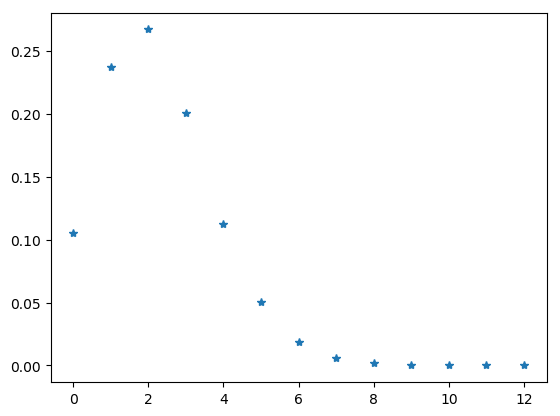

2.249989950901822 + 0.0im

In [29]:
pn = abs2.(ψα.data)
plot([0:12;],pn,"*")
expect(a⁺*a,ψα)

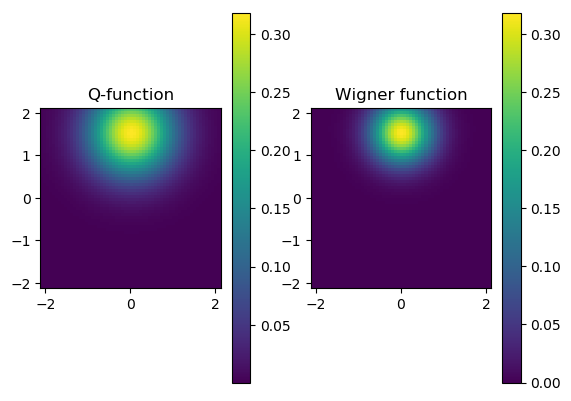

PyObject <matplotlib.colorbar.Colorbar object at 0x7f04fdd62a58>

In [11]:
subplot(121)
xv = [-3:.1:3;];yv = xv;
qα = qfunc(ψα,xv,yv)
pcolor(xv/sqrt(2),yv/sqrt(2),qα)
axis("square"); title("Q-function")
qα = wigner(ψα,xv,yv);
colorbar()
subplot(122)
pcolor(xv/sqrt(2),yv/sqrt(2),qα)
axis("square"); title("Wigner function")
colorbar()

In [12]:
β = .25
S = expm(full(β*a⁺^2 - β*a^2))

#squeezed state
ψs = S*vac

Ket(dim=13)
  basis: Fock(cutoff=12)
   0.941711+0.0im
        0.0+0.0im
   0.307719+0.0im
        0.0+0.0im
   0.123152+0.0im
        0.0+0.0im
  0.0519388+0.0im
        0.0+0.0im
  0.0225281+0.0im
        0.0+0.0im
 0.00956418+0.0im
        0.0+0.0im
 0.00519224+0.0im

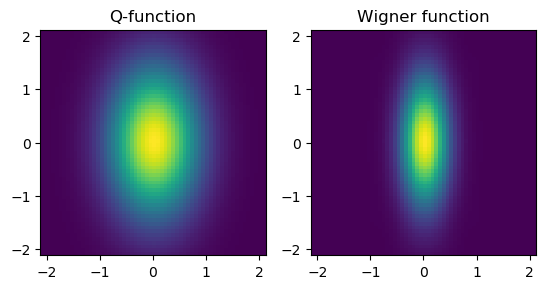

PyObject Text(0.5,1,'Wigner function')

In [13]:
#Q-function and wigner function for a squeezed state
subplot(121)
xv = [-3:.1:3;];yv = xv;
qα = qfunc(ψs,xv,yv)
pcolor(xv/sqrt(2),yv/sqrt(2),qα)
axis("square"); title("Q-function")
qα = wigner(ψs,xv,yv);
subplot(122)
pcolor(xv/sqrt(2),yv/sqrt(2),qα)
axis("square"); title("Wigner function")

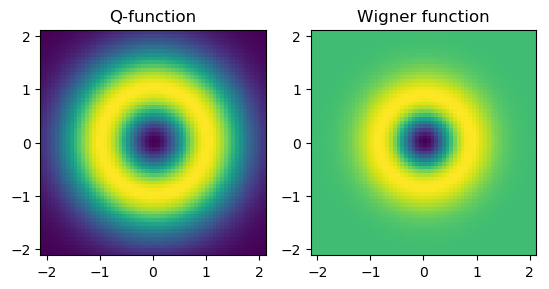

PyObject Text(0.5,1,'Wigner function')

In [14]:
#Q-function and wigner function of 1-photon function
subplot(121)
xv = [-3:.1:3;];yv = xv;
qα = qfunc(a⁺*vac,xv,yv)
pcolor(xv/sqrt(2),yv/sqrt(2),qα)
axis("square"); title("Q-function")
qα = wigner(a⁺*vac,xv,yv);
subplot(122)
pcolor(xv/sqrt(2),yv/sqrt(2),qα)
axis("square"); title("Wigner function")

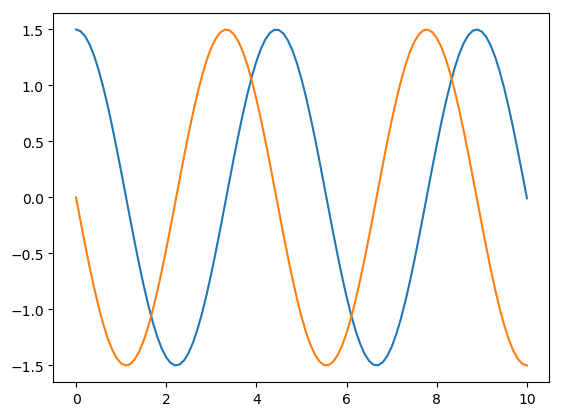

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f04fd33d908>
 PyObject <matplotlib.lines.Line2D object at 0x7f04fd33dac8>

In [15]:
T = [0:.1:10;]
tv,ψt = timeevolution.schroedinger(T,ψα,H)
at = expect(a,ψt)
plot(tv,real(at),tv,imag(at))

In [16]:
#for gif ImageMagick

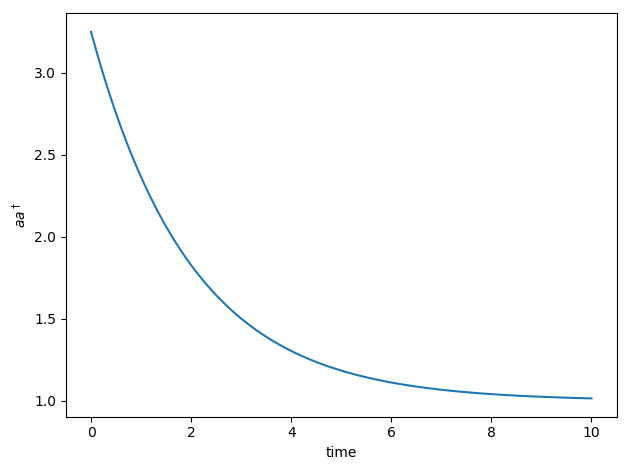

In [26]:
k = 0.5
J = [sqrt(k)*a];
# Master
n = number(b)
tout, ρt = timeevolution.master(T, ψα, H, J)
field_mean = expect(a*a⁺, ρt)
field_variance = expect((a⁺*a)^2, ρt)

plot(T, field_mean);
xlabel("time")
ylabel(L"aa^\dagger")

tight_layout();

In [28]:
η = 0.9 # Pumping strength

H = H + η*(a+a⁺)

Ev,ϕ = eigenstates((H+dagger(H))/2,5); #eigenstates and eigenvalues
tout, ρt = timeevolution.master(T, ψα, H, J) #dynamics

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0], QuantumOptics.operators_dense.DenseOperator[DenseOperator(dim=13x13)
  basis: Fock(cutoff=12)
    0.105399+0.0im    0.158099+0.0im     0.167689+0.0im  …  0.000624833+0.0im
    0.158099+0.0im    0.237148+0.0im     0.251534+0.0im      0.00093725+0.0im
    0.167689+0.0im    0.251534+0.0im     0.266792+0.0im     0.000994103+0.0im
    0.145223+0.0im    0.217835+0.0im     0.231048+0.0im     0.000860919+0.0im
    0.108917+0.0im    0.163376+0.0im     0.173286+0.0im     0.000645689+0.0im
   0.0730639+0.0im    0.109596+0.0im     0.116244+0.0im  …  0.000433141+0.0im
   0.0447423+0.0im   0.0671135+0.0im    0.0711846+0.0im     0.000265244+0.0im
   0.0253665+0.0im   0.0380498+0.0im    0.0403579+0.0im     0.000150379+0.0im
   0.0134526+0.0im   0.0201789+0.0im     0.021403+0.0im      7.97506e-5+0.0im
  0.00672632+0.0im   0.0100895+0.0im    0.0107015+0.0im      3.98753e-5+0.0im
  0.00319057+0.0im 